In [48]:
library(ggplot2)
theme_set(theme_bw())

In [49]:
df <- read.csv('../Data/2_0_summary_stats_single_file/all_data.csv', header=T)

In [50]:
df$Date <- as.factor(df$Date)
df$Date <- with(df, paste('0',df$Date,sep=""))

In [51]:
df$Analysis_Type_2 <- 'Absorption'
df$Analysis_Type_2[df$Analysis_Type=='c'] <- 'Attenuation'

In [52]:
df$milliq <- 'DI Water On-Site'
df$milliq[df$Site=='fai'] <- 'Fairbanks'
df$milliq[df$Site=='sea'] <- 'Seattle Pre'
df$milliq[df$Date=='081618'] <- 'Seattle Post'

In [53]:
levels(df$Site)

[1] "9mi" "bai" "boo" "can" "cbr" "fai" "fav" "gre" "sco" "sea" "y17" "y20"

In [54]:
df$Site_Date <- with(df, paste(Site,Date,sep="_"))

In [55]:
milliq <- df[df$Site %in% c('sea','fai'),]

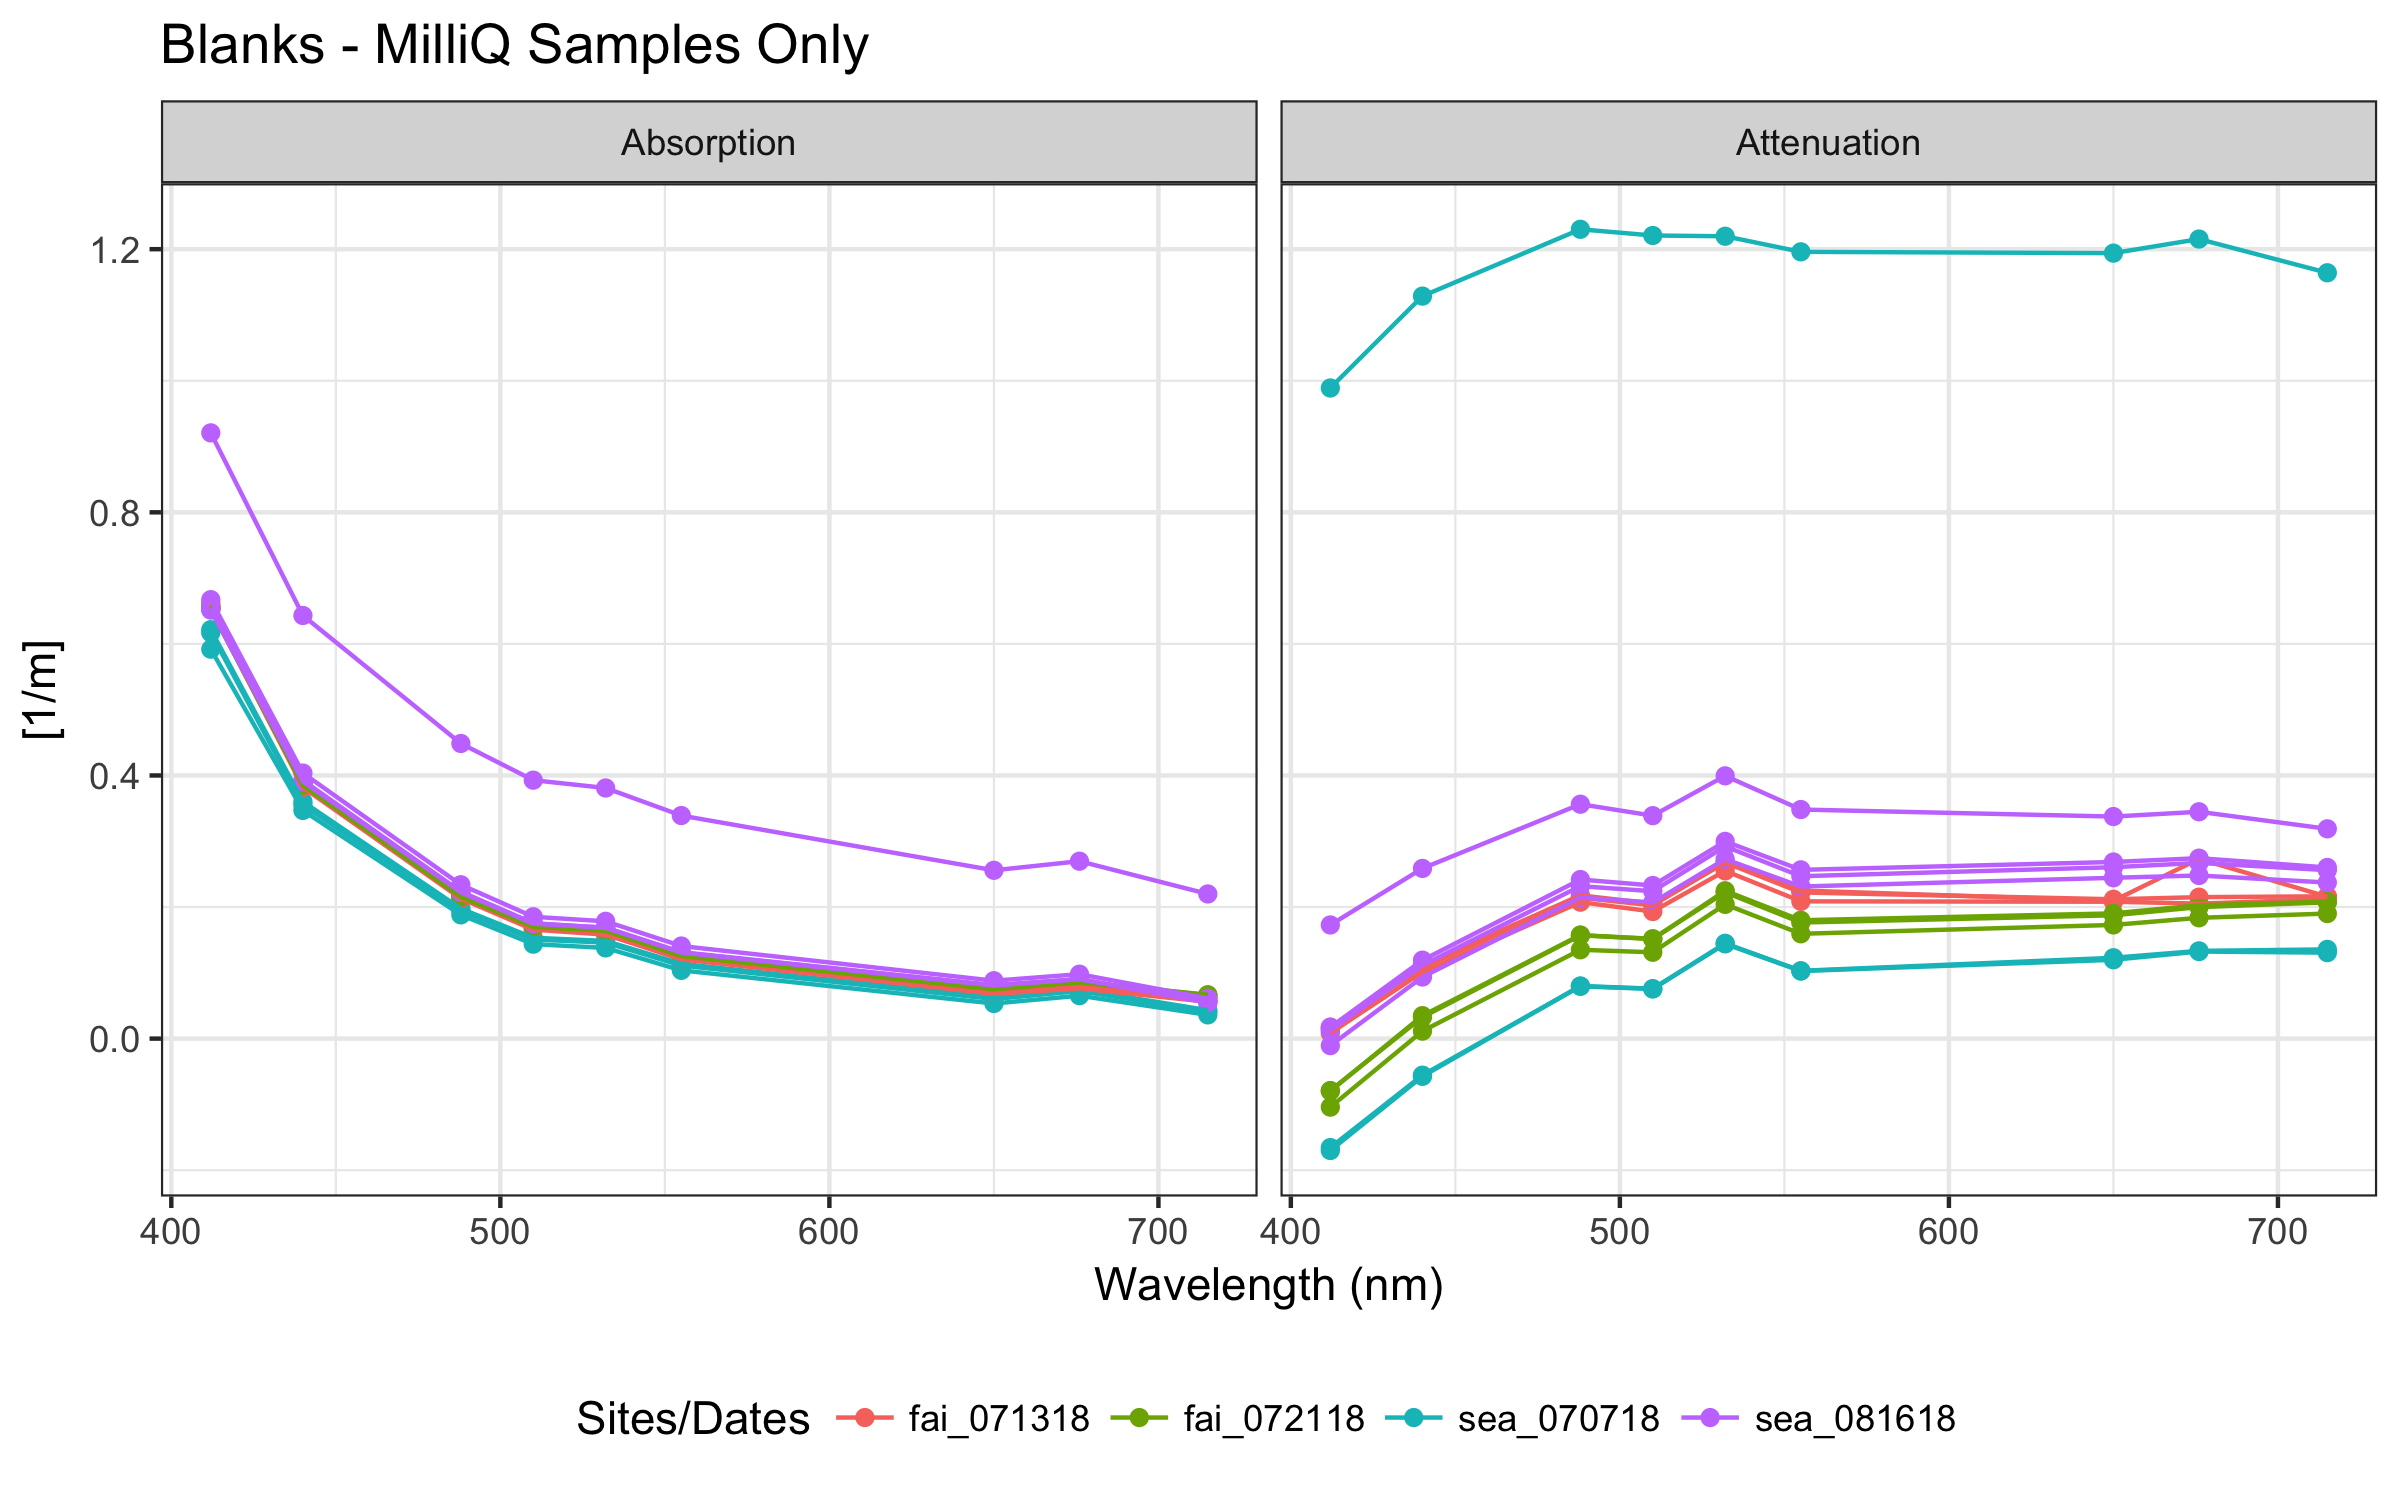

In [61]:
options(repr.plot.width=8, repr.plot.height=5, repr.plot.res = 300)
ggplot(milliq[milliq$Sample_Type=='cal',], aes(x=wl, y=mean, color=Site_Date, group=ID)) +
    geom_point() +
    geom_line() +
    facet_grid(.~Analysis_Type_2) +
    theme(legend.position = 'bottom') +
    labs(x='Wavelength (nm)', y='[1/m]', color='Sites/Dates', title="Blanks - MilliQ Samples Only")

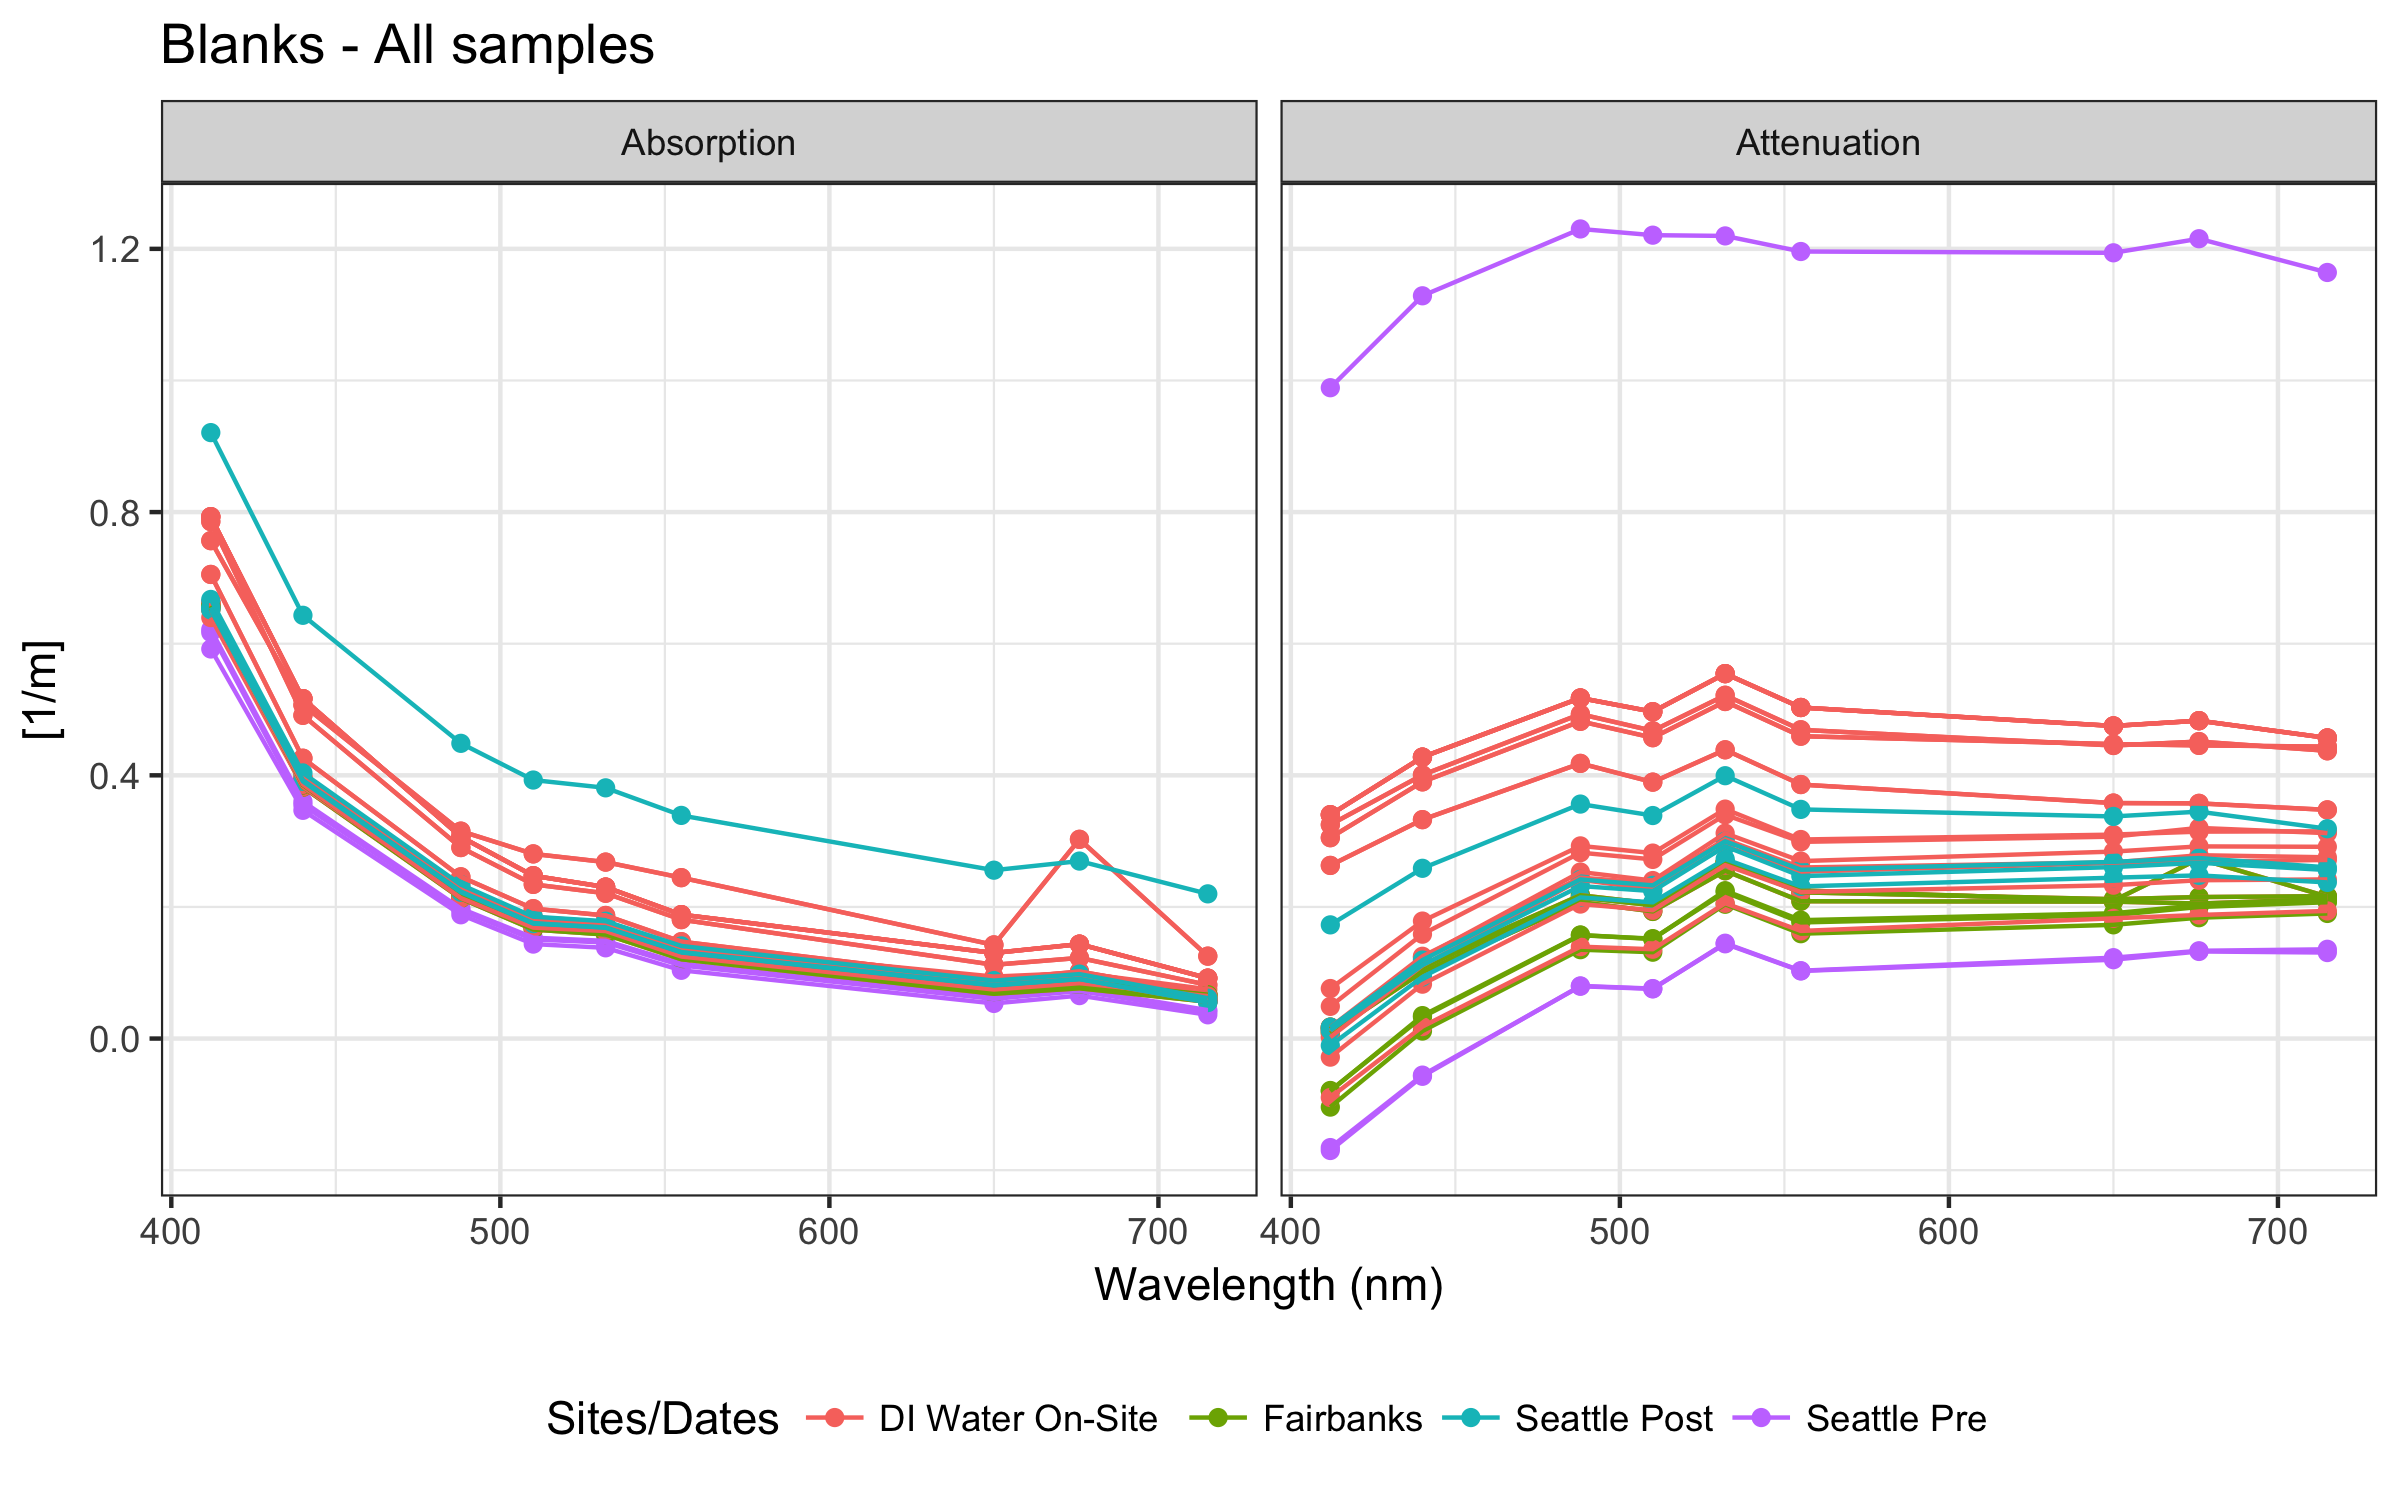

In [59]:
options(repr.plot.width=8, repr.plot.height=5, repr.plot.res = 300)
ggplot(df[df$Sample_Type=='cal',], aes(x=wl, y=mean, color=milliq, group=ID)) +
    geom_point() +
    geom_line() +
    facet_grid(.~Analysis_Type_2) +
    theme(legend.position = 'bottom') +
    labs(x='Wavelength (nm)', y='[1/m]', color='Sites/Dates', title="Blanks - All samples")

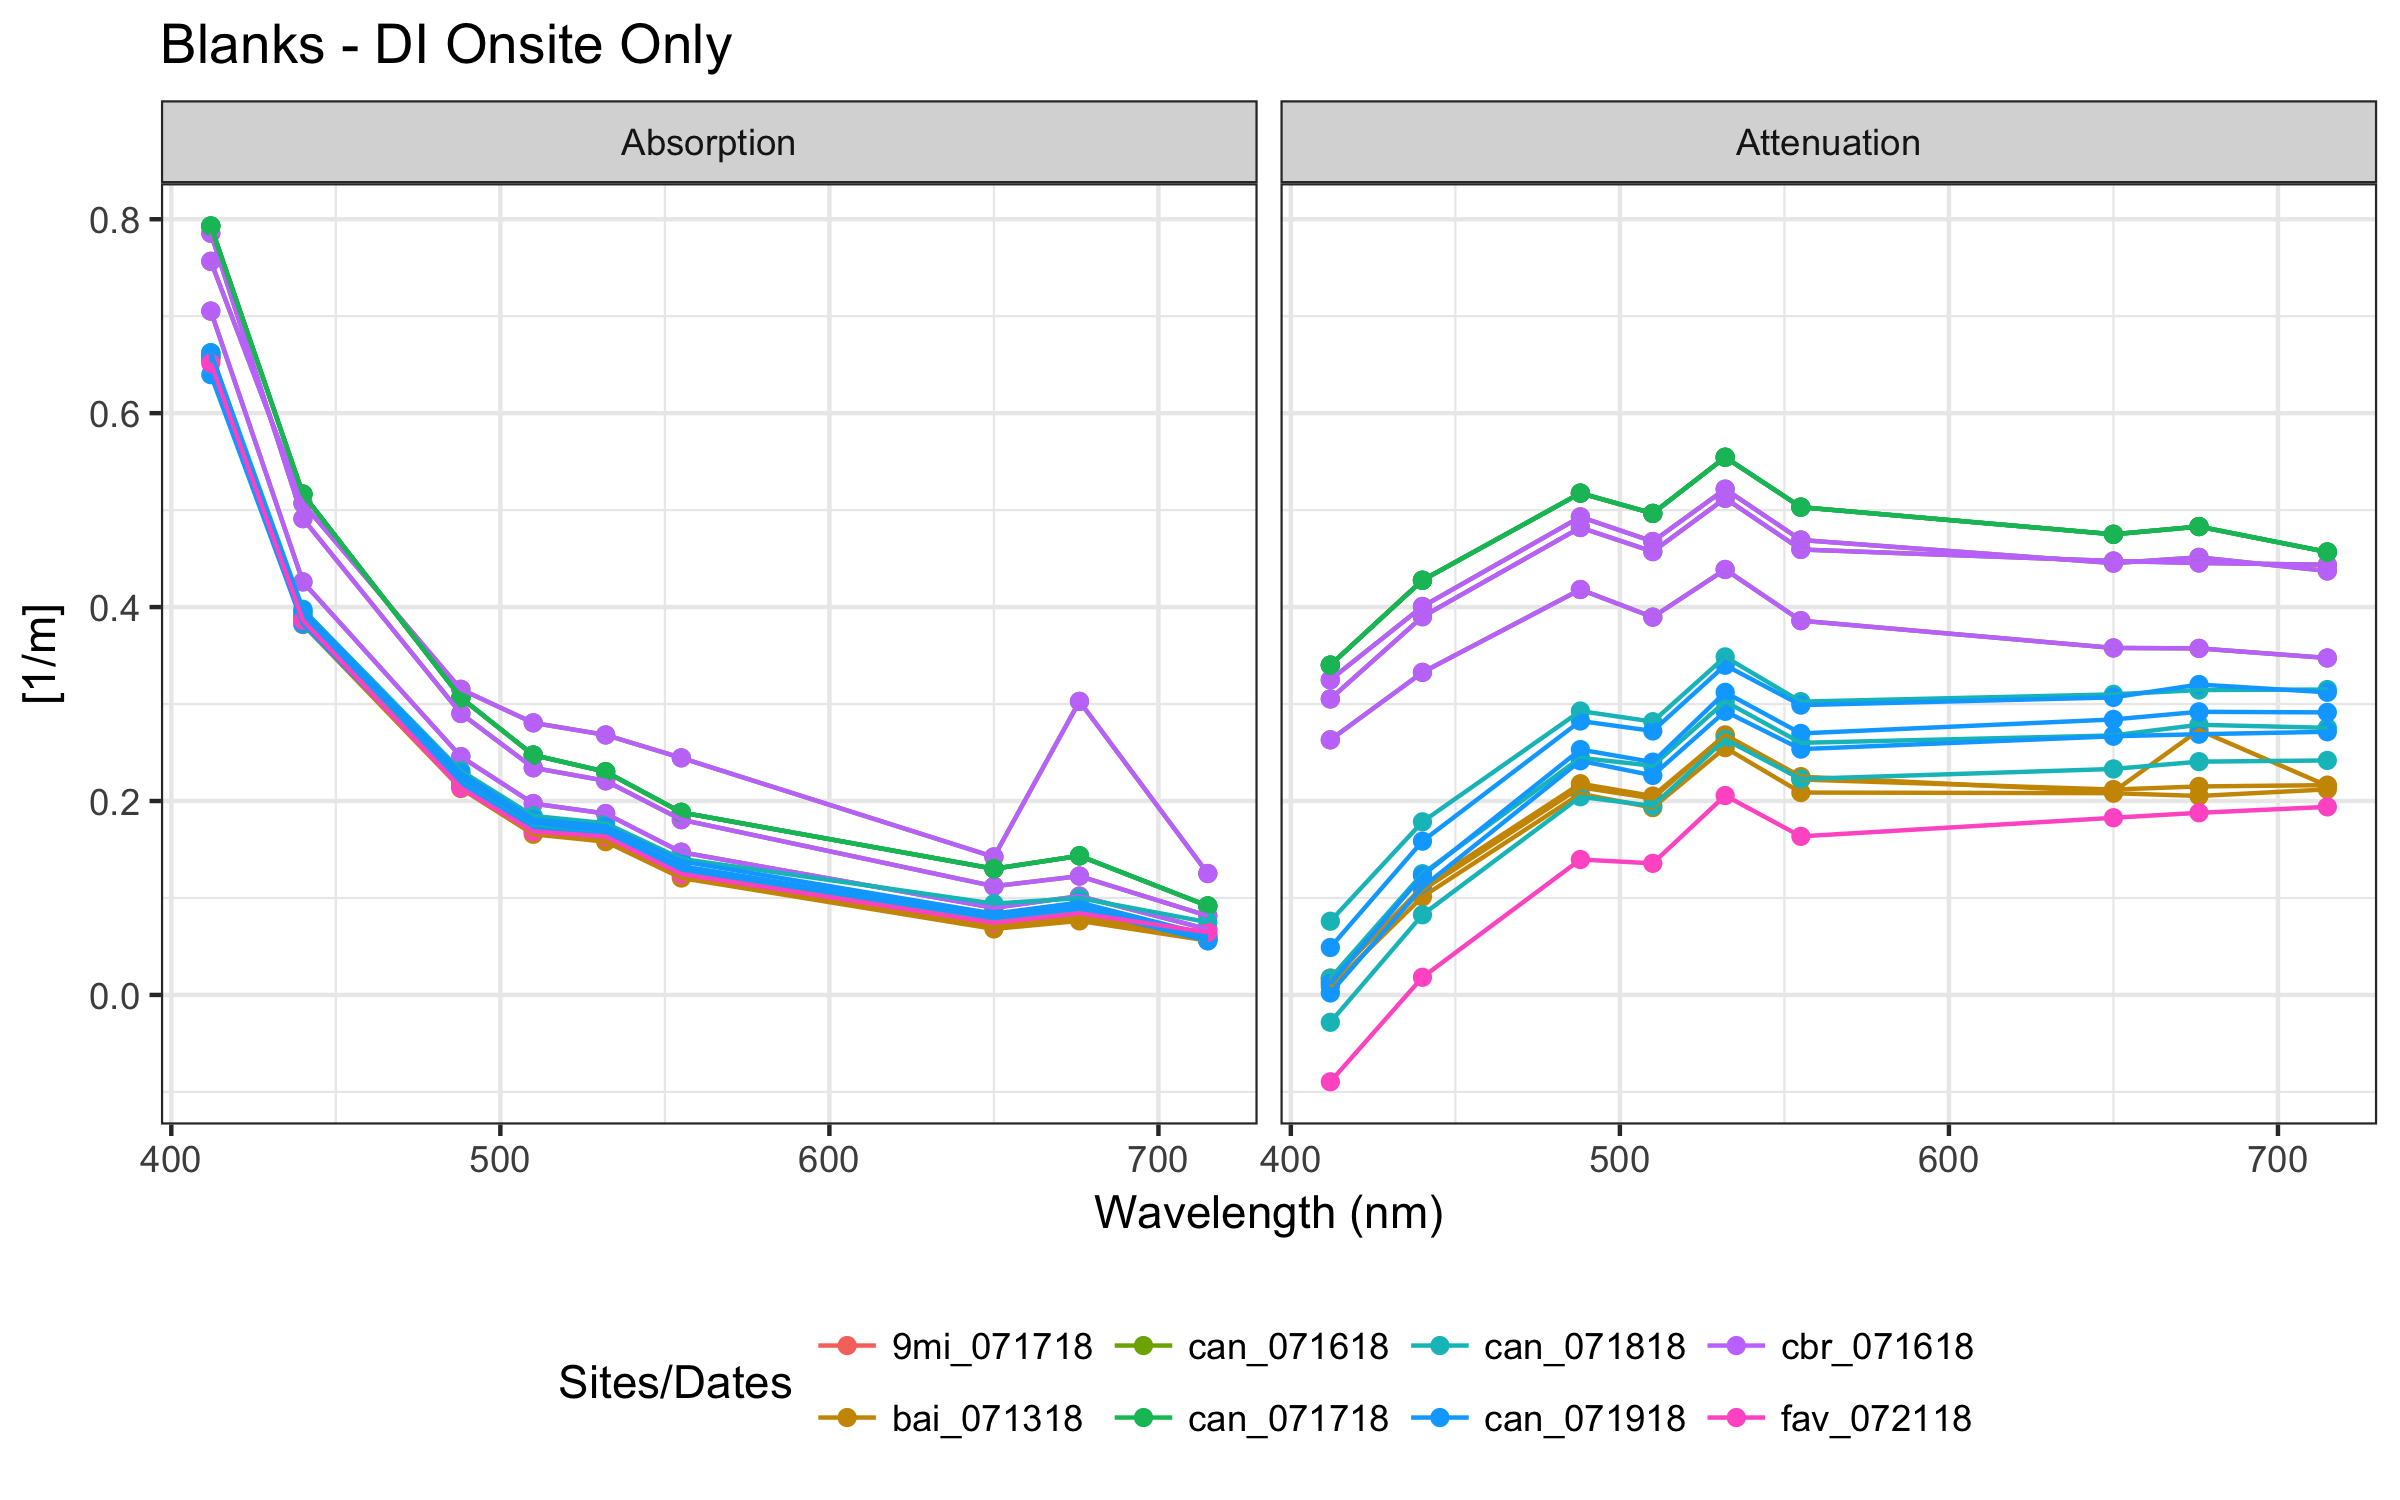

In [71]:
options(repr.plot.width=8, repr.plot.height=5, repr.plot.res = 300)
ggplot(df[df$Sample_Type=='cal'&!(df$Site %in% c('sea','fai')),], aes(x=wl, y=mean, color=Site_Date, group=ID)) +
    geom_point() +
    geom_line() +
    facet_grid(.~Analysis_Type_2) +
    theme(legend.position = 'bottom') +
    labs(x='Wavelength (nm)', y='[1/m]', color='Sites/Dates', title="Blanks - DI Onsite Only")

In [79]:
options(repr.plot.width=8, repr.plot.height=5, repr.plot.res = 300)
p <- ggplot(milliq[milliq$Sample_Type=='cal',], aes(x=wl, y=mean, color=Site_Date, group=ID)) +
    geom_point() +
    geom_line() +
    facet_grid(.~Analysis_Type_2) +
    theme(legend.position = 'bottom') +
    geom_text(aes(label=Rep)) +
    labs(x='Wavelength (nm)', y='[1/m]', color='Sites/Dates', title="Blanks - MilliQ Samples Only")

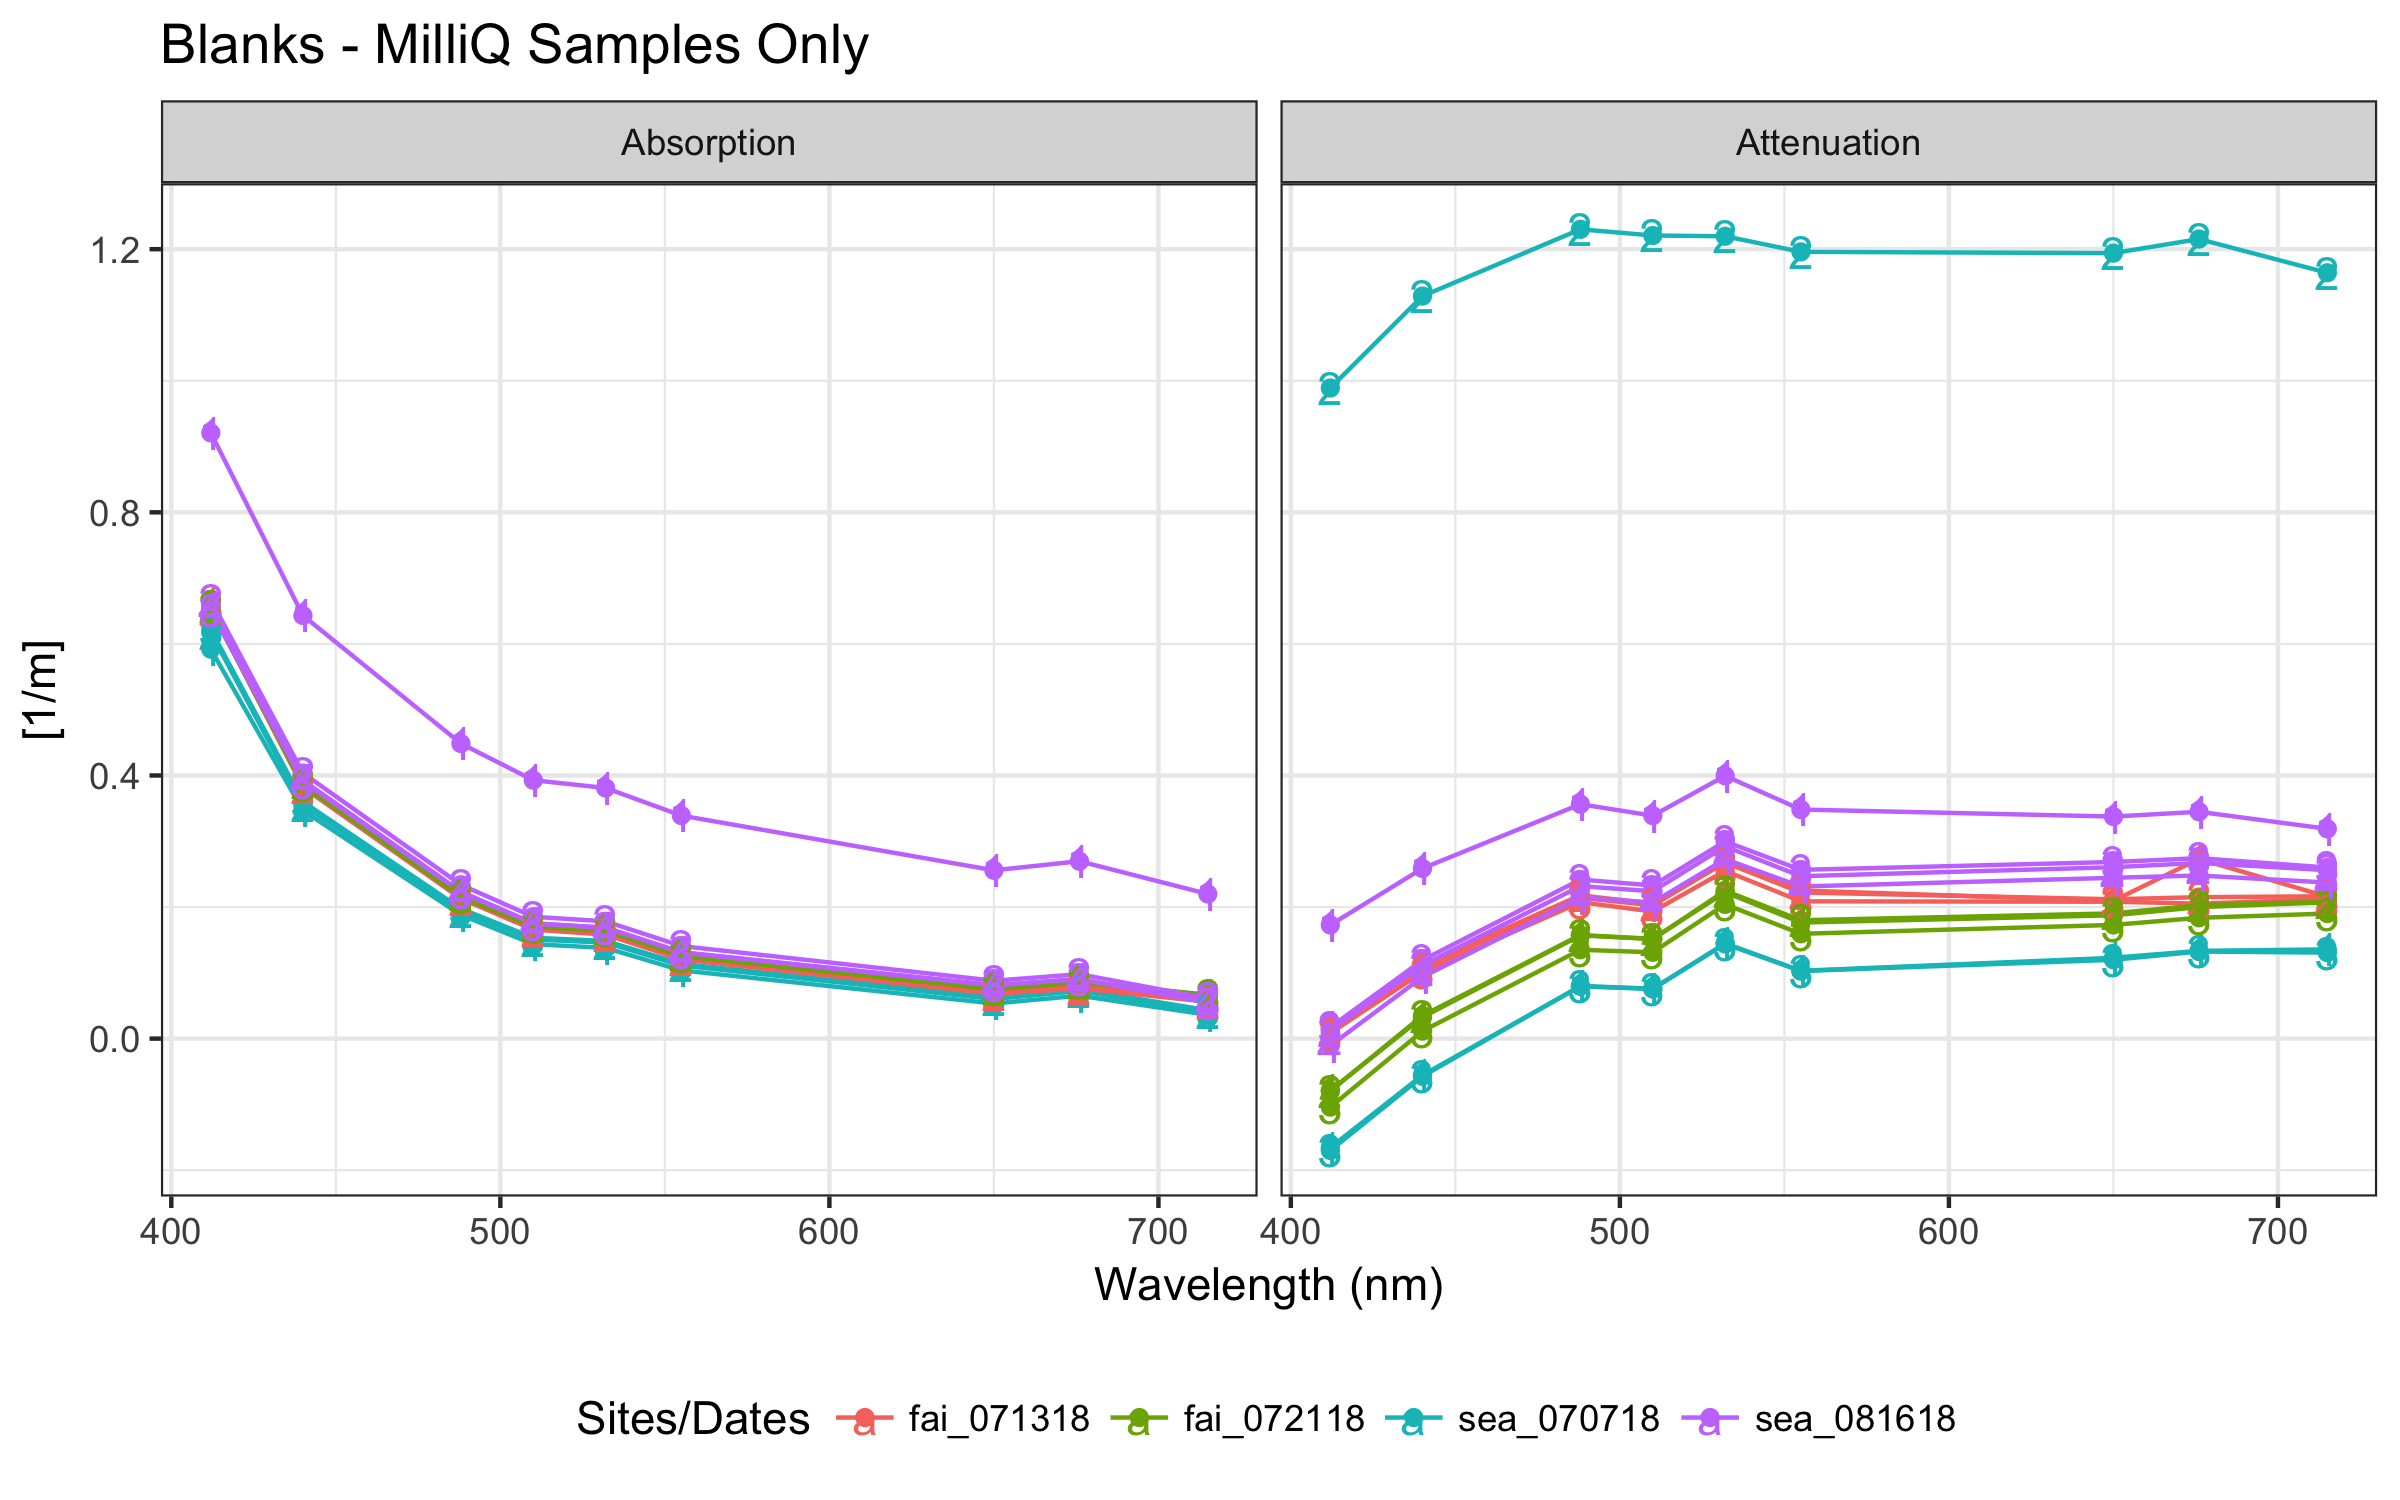

In [80]:
p

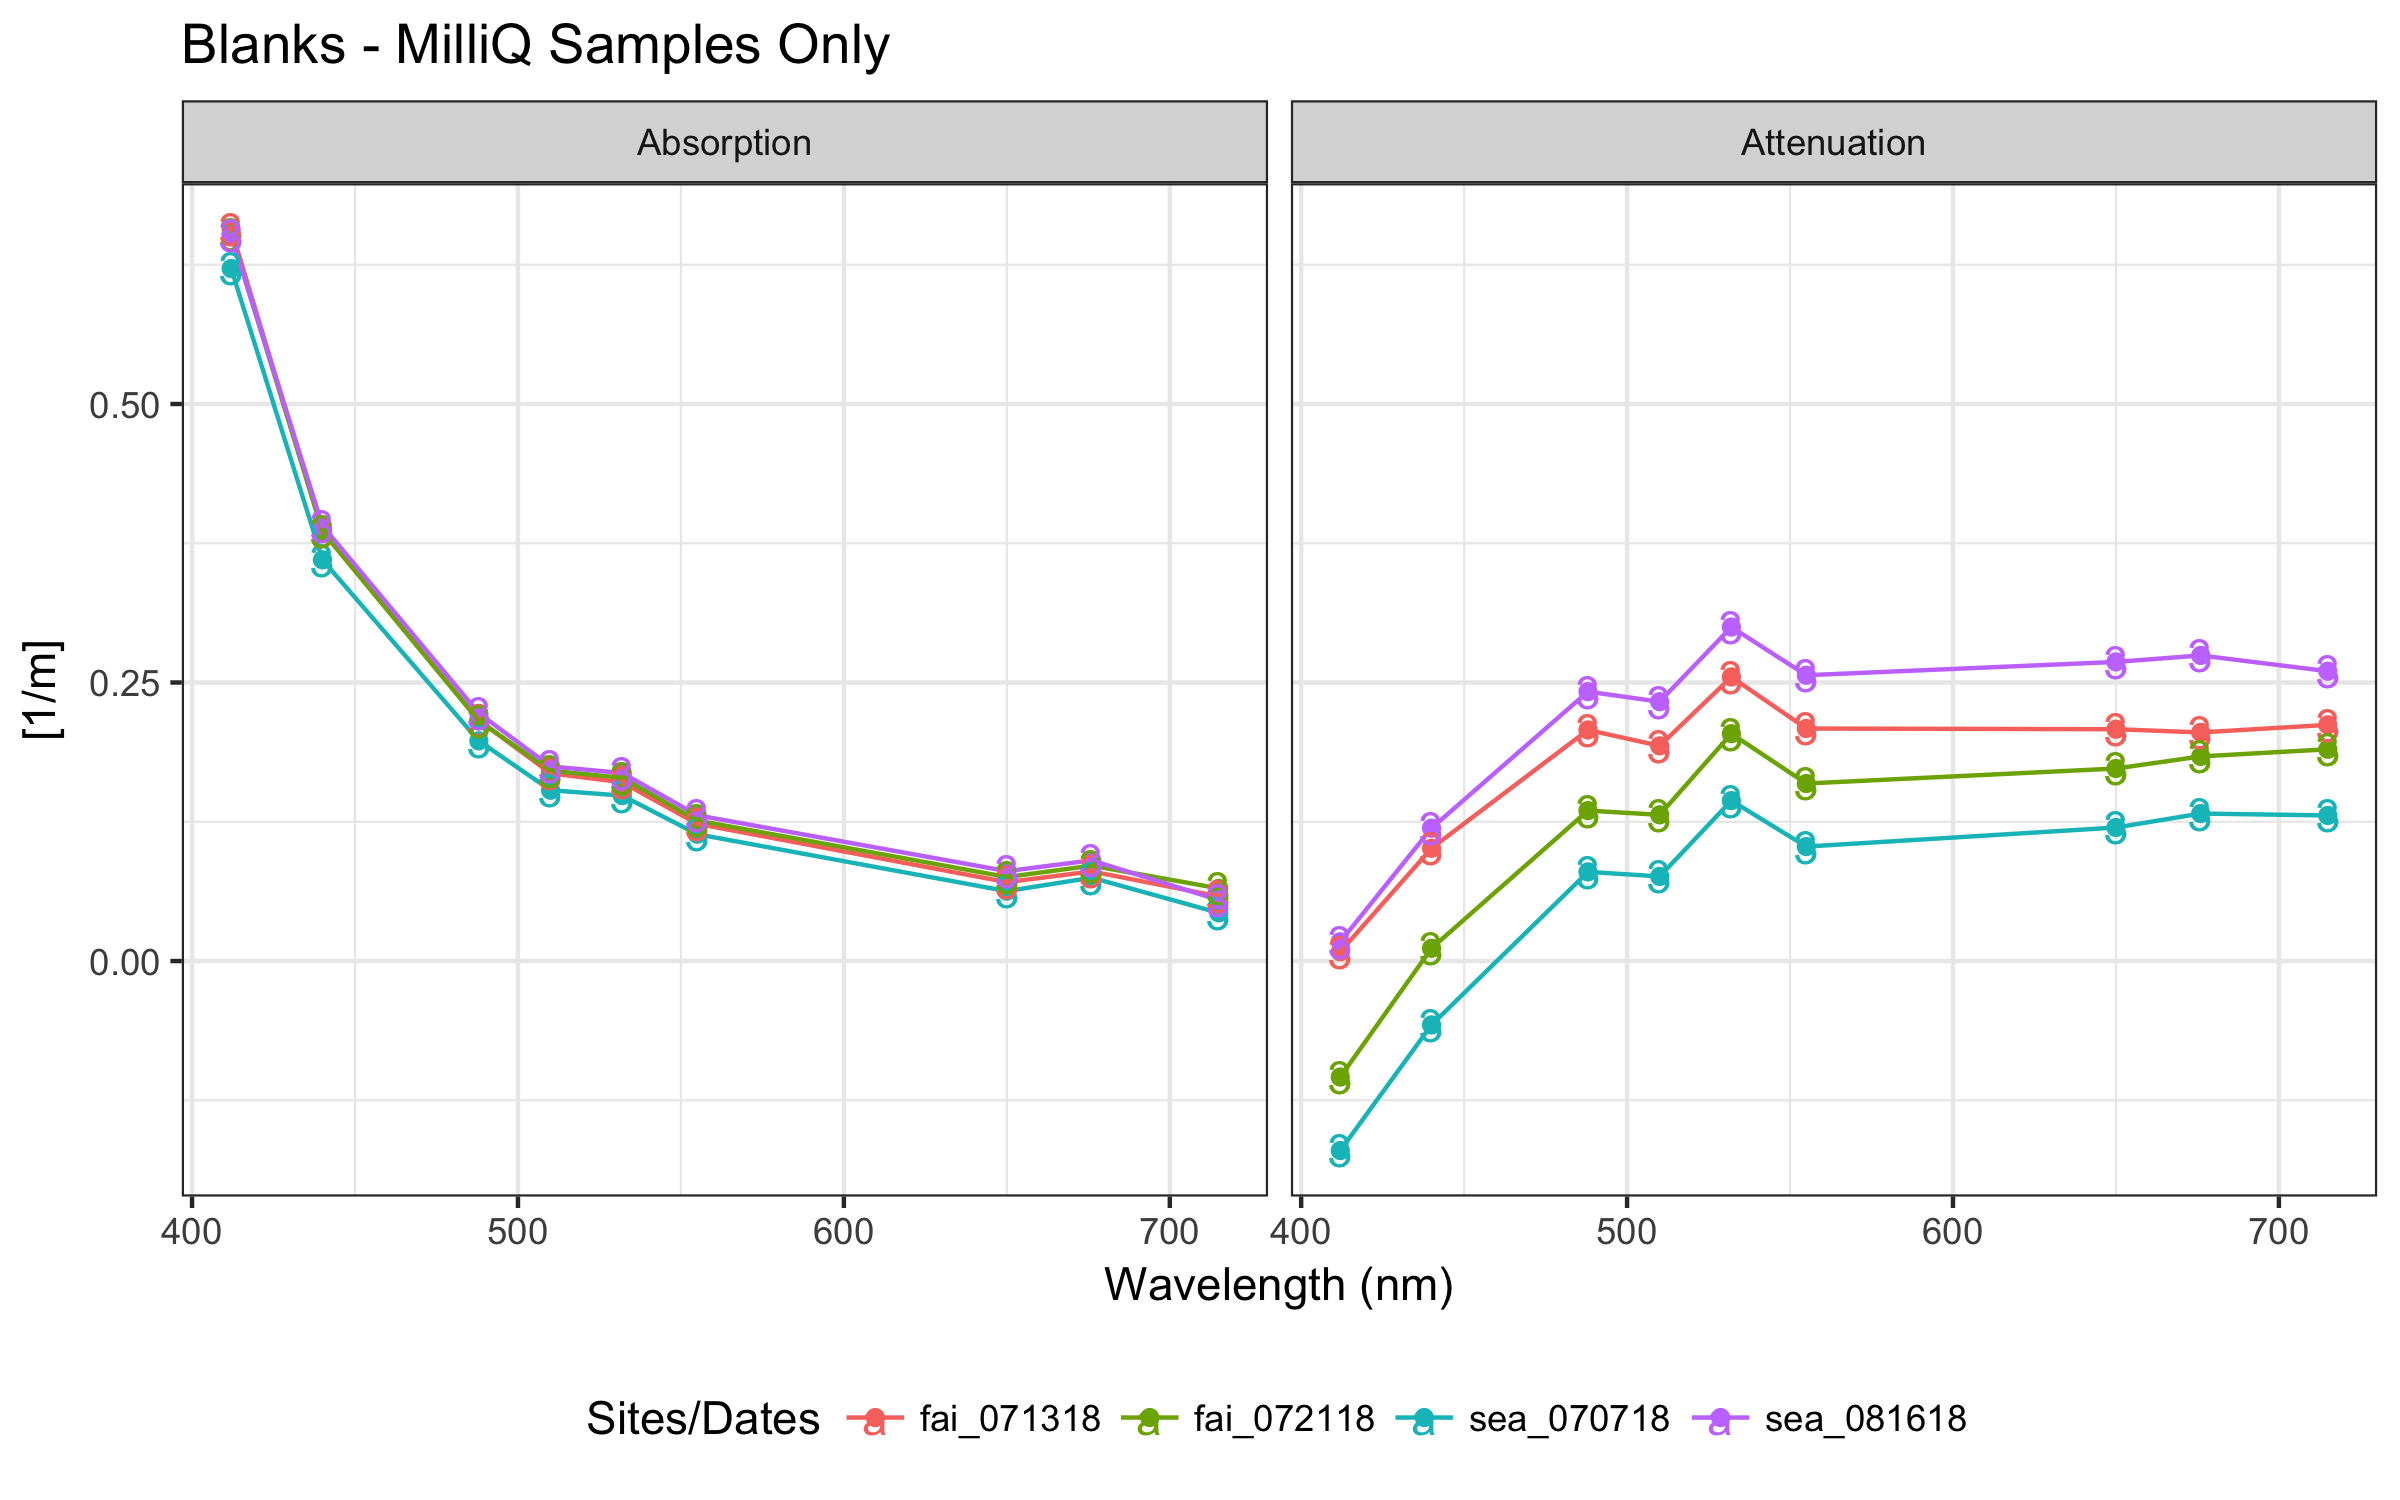

In [81]:
ggplot(milliq[milliq$Sample_Type=='cal'&milliq$Rep==3,], aes(x=wl, y=mean, color=Site_Date, group=ID)) +
    geom_point() +
    geom_line() +
    facet_grid(.~Analysis_Type_2) +
    theme(legend.position = 'bottom') +
    geom_text(aes(label=Rep)) +
    labs(x='Wavelength (nm)', y='[1/m]', color='Sites/Dates', title="Blanks - MilliQ Samples Only")

### So, who is the cleanest of them all?

In [87]:
unique(milliq$ID[milliq$Site=='sea'&milliq$Sample_Type=='cal'&milliq$Date=='070718'&milliq$Rep==3])

[1] AC9_070718_sea_cal_a_3_T20_9 AC9_070718_sea_cal_c_3_T20_6
182 Levels: AC9_070718_sea_cal_a_1_T20_6 ... AC9_081618_sea_cal_c_4_T18_5